# Level2

## Task1: Table Booking and Online Delivery

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('cognifyz dataset.csv')

In [37]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [38]:
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [39]:
table_booking_percentage = (df['Has Table booking'].sum() / len(df)) * 100
online_delivery_percentage = (df['Has Online delivery'].sum() / len(df)) * 100

print(f"Percentage of restaurants offering table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


In [40]:
online_delivery_by_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack(fill_value=0) * 100

In [41]:
print(" Price range of Availability of online delivery:")
print(online_delivery_by_price_range)

 Price range of Availability of online delivery:
Has Online delivery          0          1
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


In [42]:
common_cuisines = df['Cuisines'].str.split(', ', expand=True).stack().value_counts().head(10)
print("Top 10 most common cuisines:")
print(common_cuisines)

Top 10 most common cuisines:
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


In [43]:
restaurants_by_city = df['City'].value_counts().head(10)
print("Top 10 cities with the most restaurants:")
print(restaurants_by_city)

Top 10 cities with the most restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


In [44]:
average_cost_by_city = df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)
print("Top 10 cities with the highest average cost for two person:")
print(average_cost_by_city)

Top 10 cities with the highest average cost for two person:
City
Jakarta             308437.500000
Tangerang           250000.000000
Bogor               160000.000000
Bandung             150000.000000
Pasay City            3333.333333
Colombo               2375.000000
Mandaluyong City      2000.000000
Panchkula             2000.000000
Taguig City           1725.000000
Hyderabad             1361.111111
Name: Average Cost for two, dtype: float64


In [45]:
unique_colors = df['Rating color'].unique()
print(unique_colors)

['Dark Green' 'Green' 'Yellow' 'Orange' 'White' 'Red']


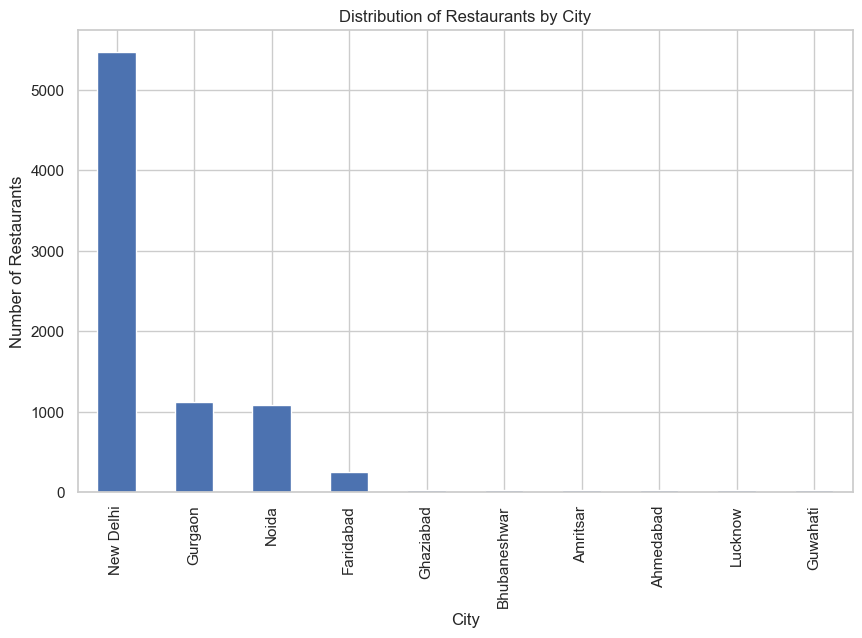

In [46]:
plt.figure(figsize=(10, 6))
restaurants_by_city.plot(kind='bar')
plt.title('Distribution of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

## Task2: Price Range Analysis

In [47]:
most_common_price_range = df['Price range'].mode()[0]
print(f"The most common price range is: {most_common_price_range}")

The most common price range is: 1


In [48]:
average_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean().reset_index()
print("Average rating for each price range:")
print(average_rating_by_price)

Average rating for each price range:
   Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918


In [49]:
average_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean().reset_index()
highest_avg_rating_color = average_rating_by_price.sort_values(by='Aggregate rating', ascending=False).iloc[0]
print("The price range with the highest average rating is:", highest_avg_rating_color['Price range'])
print("The highest average rating in this price range is:", highest_avg_rating_color['Aggregate rating'])

The price range with the highest average rating is: 4.0
The highest average rating in this price range is: 3.8179180887372017


In [50]:
table_booking_percentage = (df['Has Table booking'] == 'Yes').mean() * 100
online_delivery_percentage = (df['Has Online delivery'] == 'Yes').mean() * 100

print(f"\nPercentage of restaurants that offer table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%")


Percentage of restaurants that offer table booking: 0.00%
Percentage of restaurants that offer online delivery: 0.00%


In [51]:
avg_rating_with_table_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"\nAverage rating for restaurants with table booking: {avg_rating_with_table_booking:.2f}")
print(f"Average rating for restaurants without table booking: {avg_rating_without_table_booking:.2f}")


Average rating for restaurants with table booking: nan
Average rating for restaurants without table booking: nan


In [52]:
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
print("\nAvailability of online delivery among restaurants with different price ranges:")
print(online_delivery_by_price)


Availability of online delivery among restaurants with different price ranges:
Has Online delivery         0         1
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444


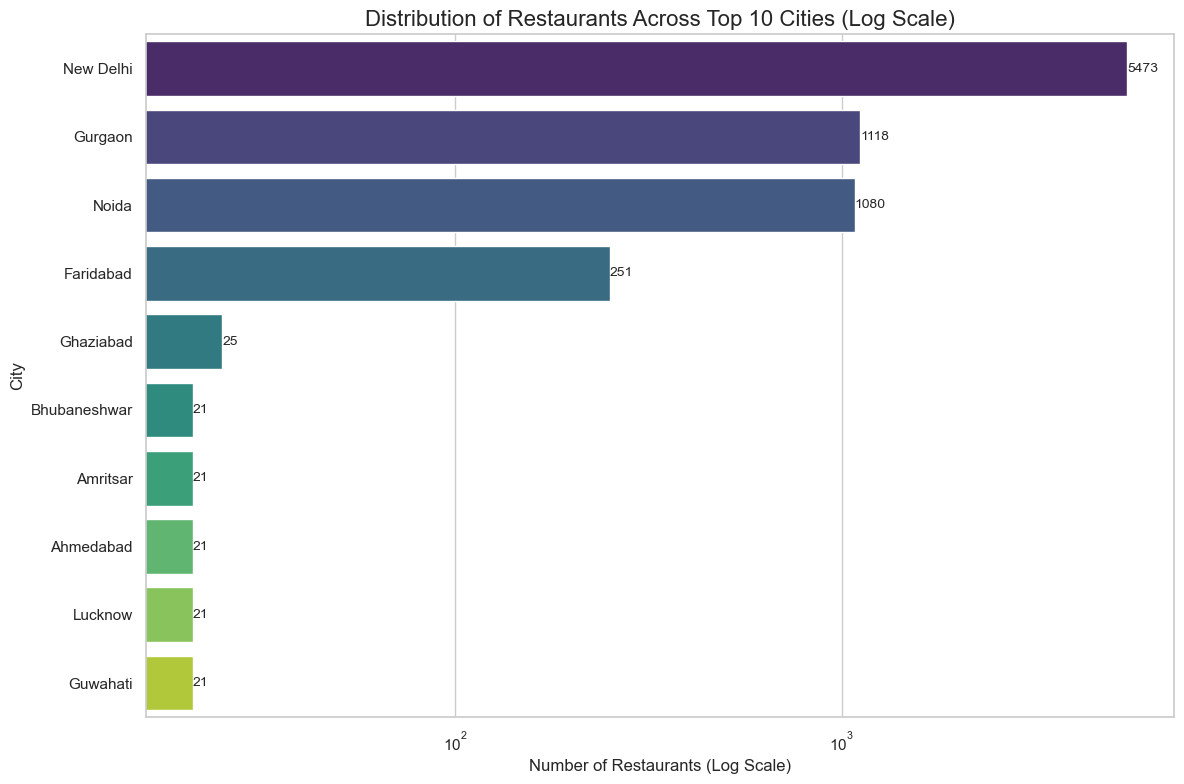

In [53]:
top_10_cities = df['City'].value_counts().head(10).index
data_top_10 = df[df['City'].isin(top_10_cities)]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='City', data=data_top_10, order=top_10_cities, palette="viridis")
ax.set_xscale("log")  
plt.title('Distribution of Restaurants Across Top 10 Cities (Log Scale)', fontsize=16)
plt.xlabel('Number of Restaurants (Log Scale)', fontsize=12)
plt.ylabel('City', fontsize=12)
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha="left", va="center", fontsize=10)
plt.tight_layout()
plt.show()

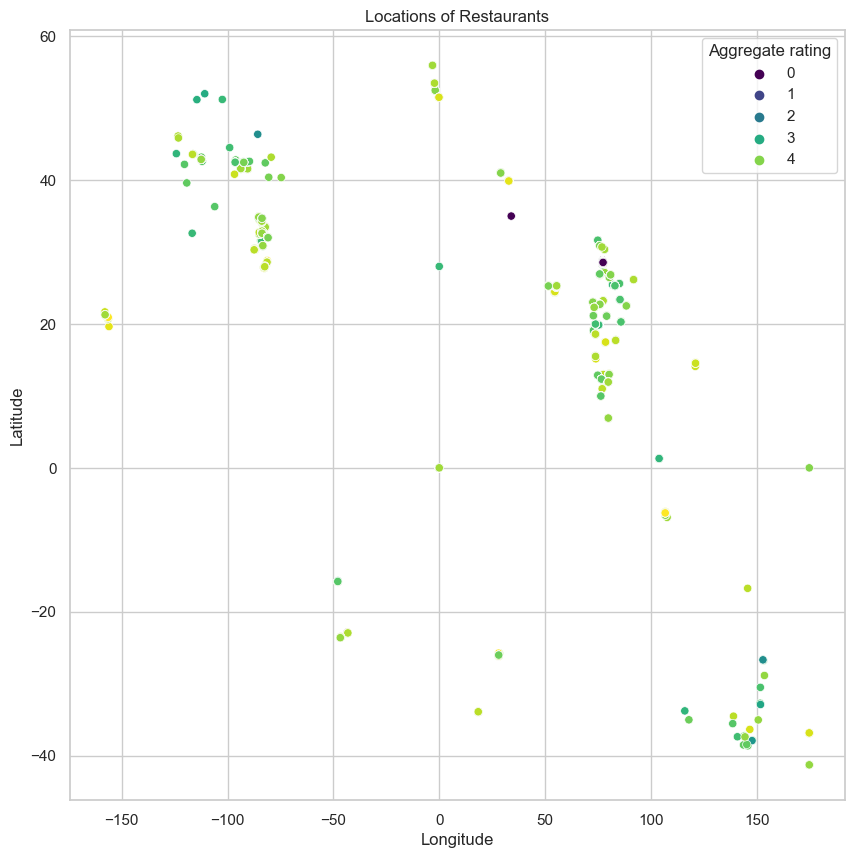

In [54]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Aggregate rating', palette='viridis')
plt.title('Locations of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

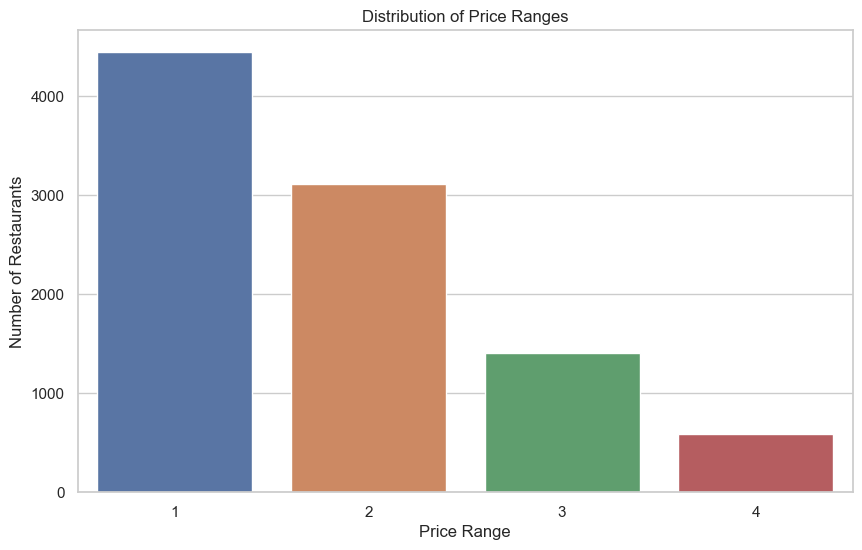

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', data=df)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

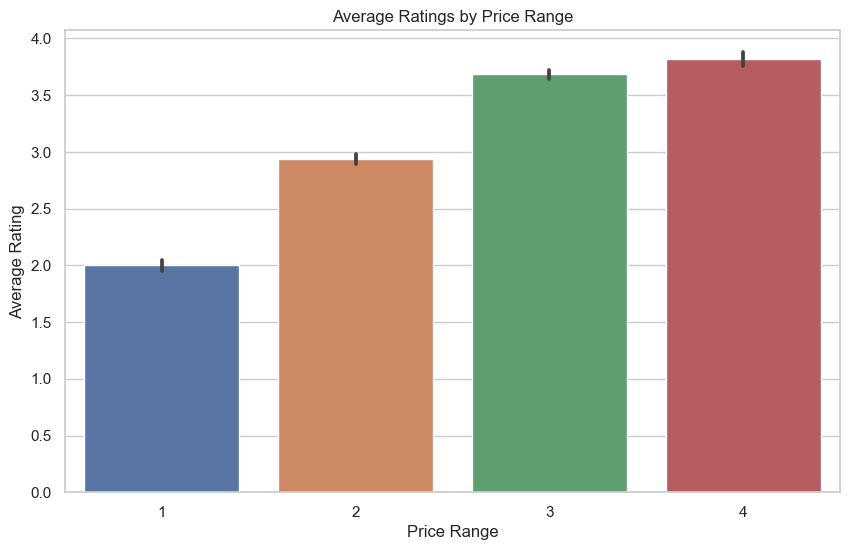

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Average Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

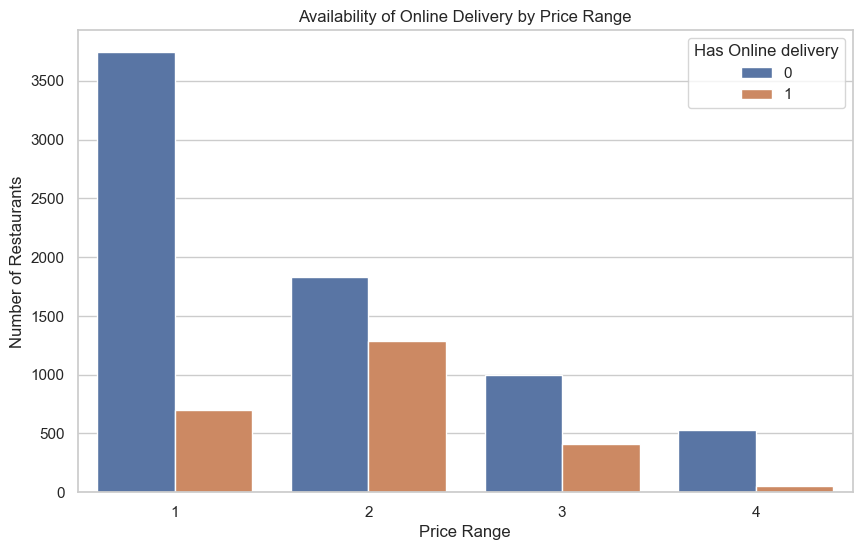

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=df)
plt.title('Availability of Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

## Task3: Feature Engineering

In [58]:
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

In [59]:
df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [60]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [61]:
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

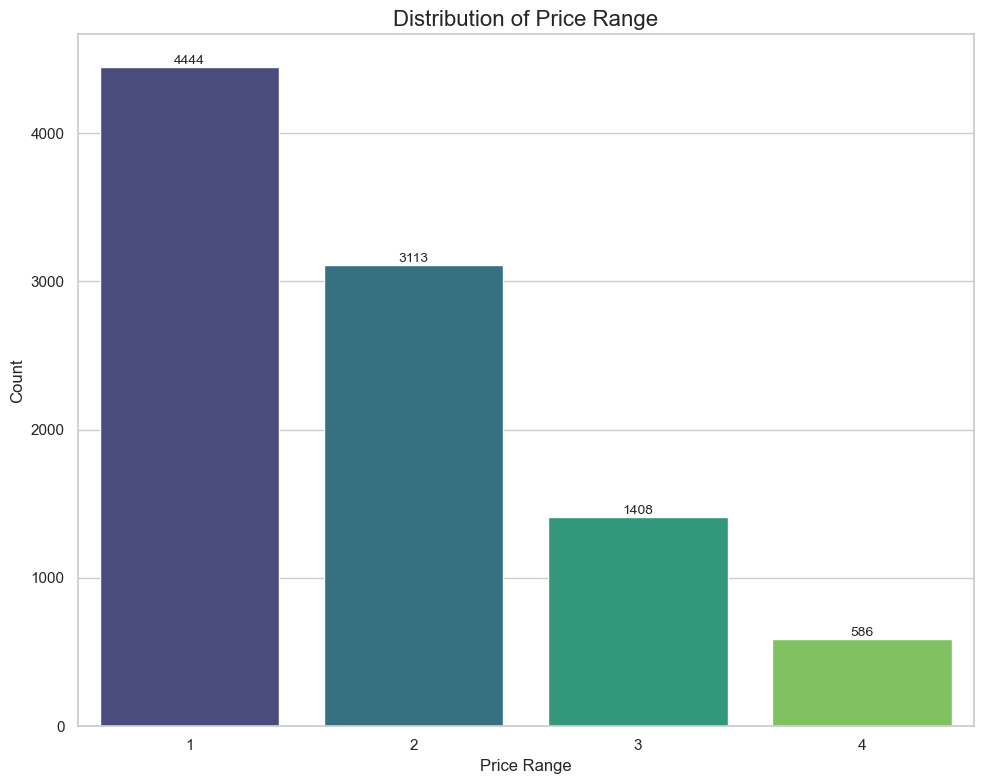

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Price range', data=df, palette='viridis')
plt.title('Distribution of Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

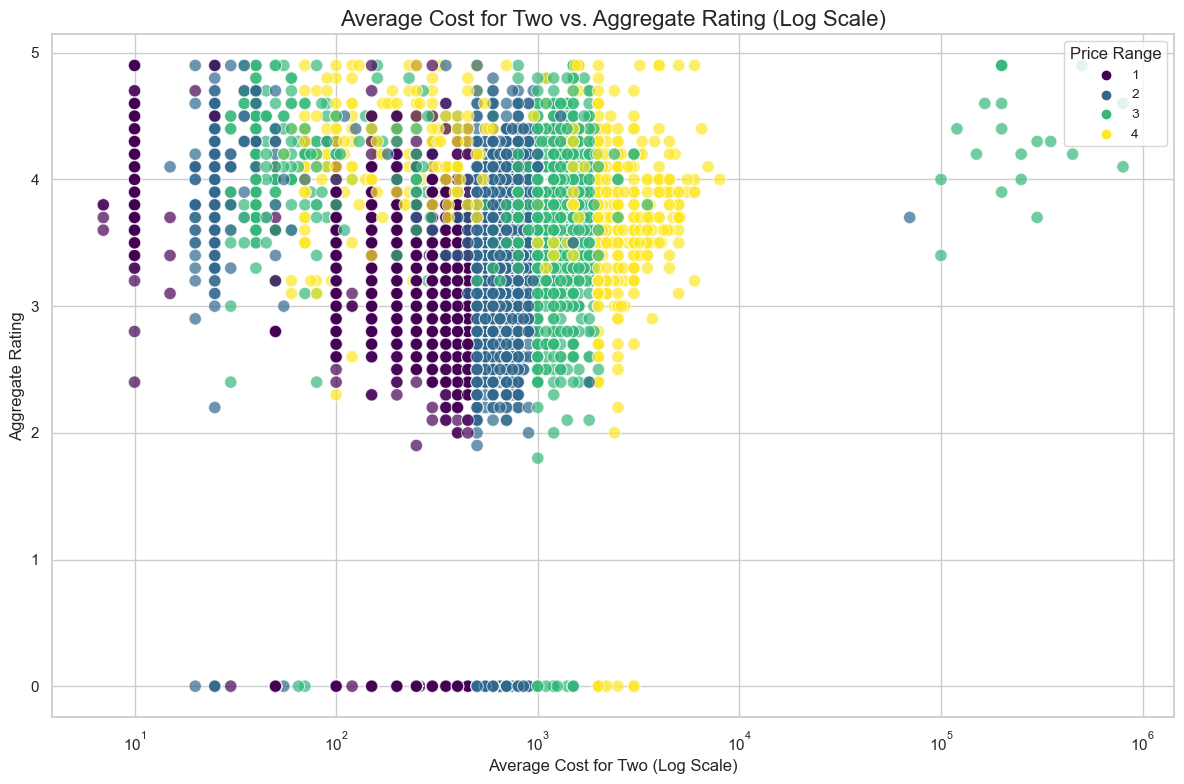

In [63]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, hue='Price range', palette='viridis', s=80, alpha=0.7)
plt.xscale("log")
plt.title('Average Cost for Two vs. Aggregate Rating (Log Scale)', fontsize=16)
plt.xlabel('Average Cost for Two (Log Scale)', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.legend(title='Price Range', title_fontsize='12', loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

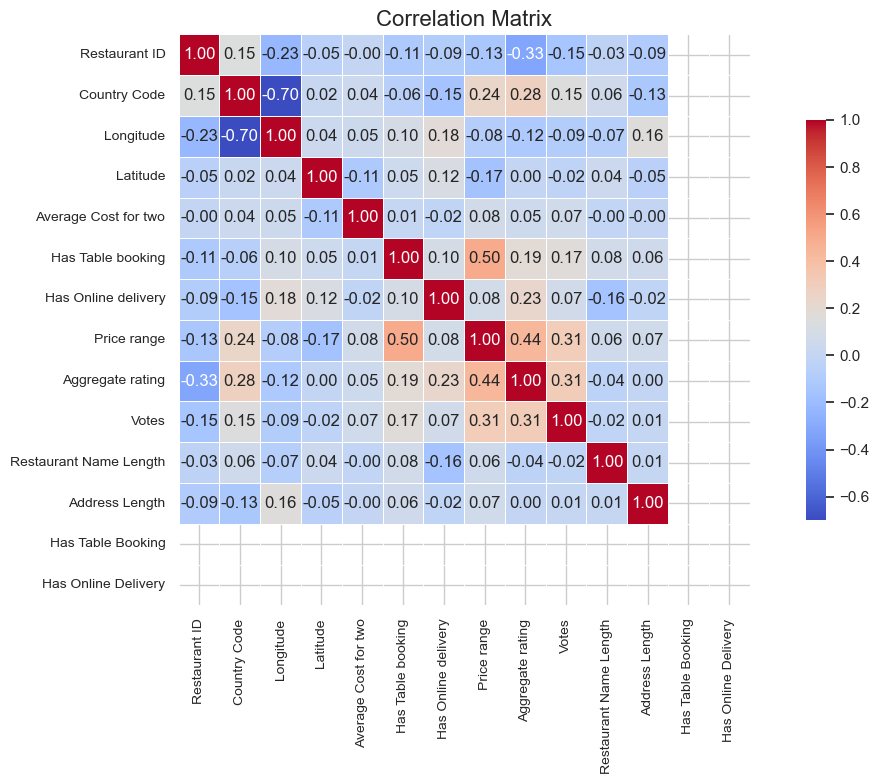

In [64]:
sns.set_style("whitegrid")
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True, cbar_kws={"shrink": 0.7})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\vamak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


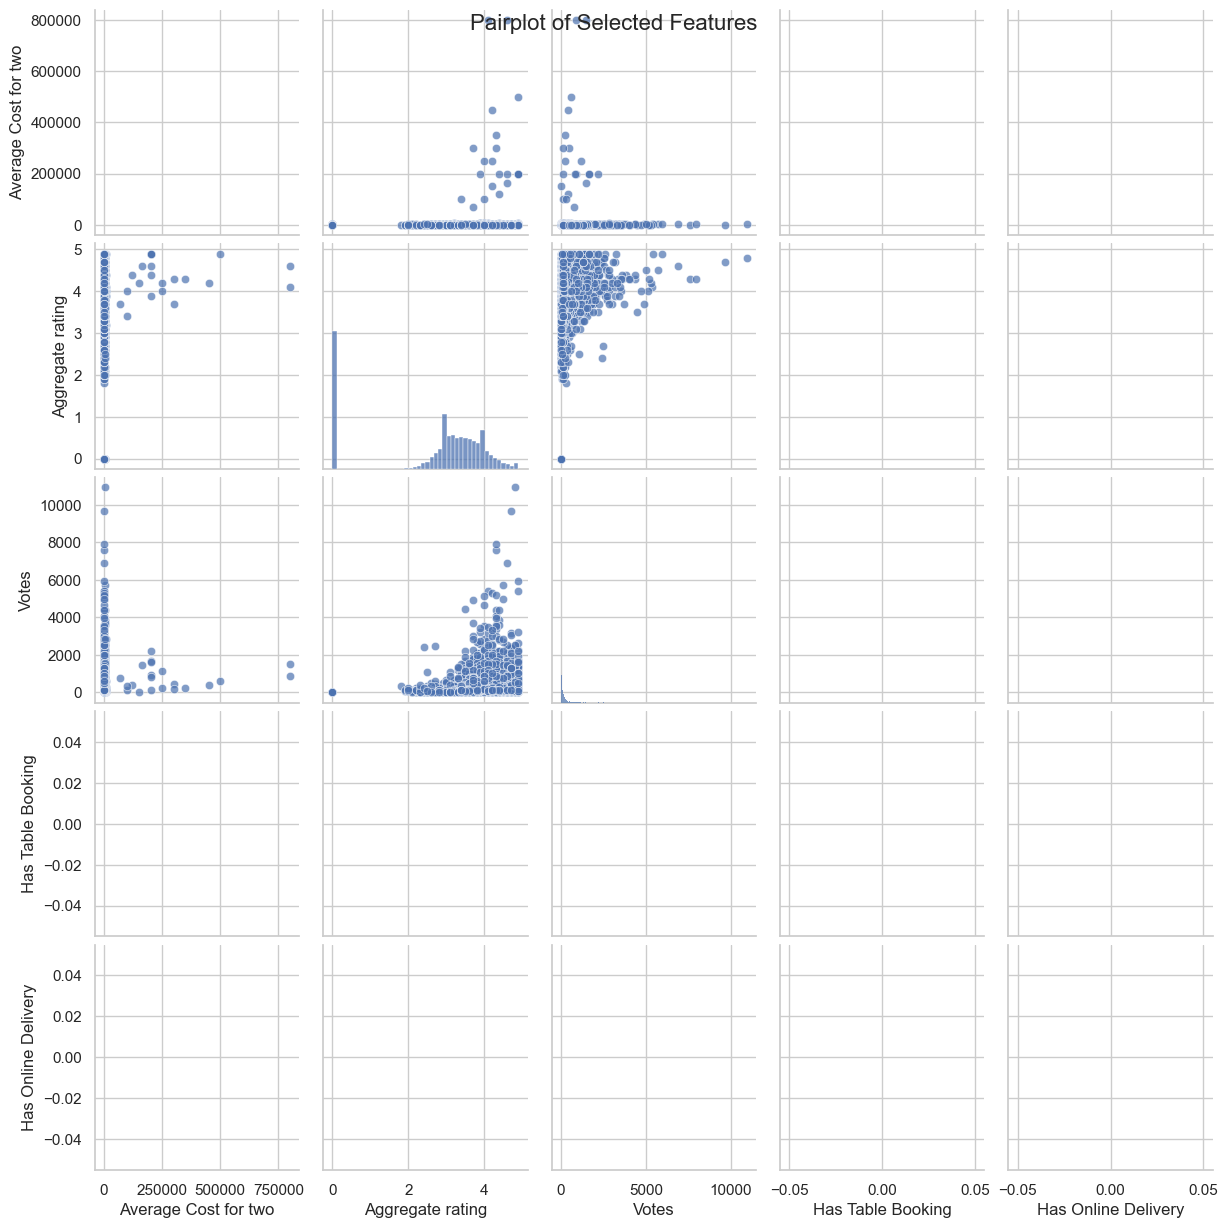

In [65]:
selected_columns = ['Average Cost for two', 'Aggregate rating', 'Votes', 'Has Table Booking', 'Has Online Delivery']
selected_data = df[selected_columns]
sns.set_style("whitegrid")
pairplot = sns.pairplot(selected_data, plot_kws={'alpha': 0.7})
pairplot.fig.suptitle('Pairplot of Selected Features', fontsize=16)
plt.show()